# Time Series Forecasting
* Sales order data
* Using Prophet

#### Import modules

In [148]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
from prophet import Prophet
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
# %matplotlib notebook
%matplotlib ipympl

pd.set_option('display.float_format', lambda x: '%.2f' % x) 
# The '%.6f' formats the float to 6 decimal places. Adjust as needed.


#### Read data

In [ ]:
# get data
df = pd.read_csv('data/XXXXXXXXXXX.csv')
df_sales = df.copy()
df_sales = df_sales[['DATE', 'SALES']]
df_sales.rename(columns={'DATE': 'ds', 'SALES': 'y'}, inplace=True)
df_sales['ds'] = pd.to_datetime(df_sales['ds'])   # Convert the 'ds' column to a datetime object
df_sales = df_sales.reset_index(drop=True).set_index('ds')
# df_sales = df_sales.reset_index(drop=True)
df_sales.head()



,y
ds,
2023-05-04,17769984.95
2023-05-05,66170045.11
2023-05-06,10546812.41
2023-05-09,2725992.98
2023-05-10,1178226.14


In [4]:
df_sales.index.max() , df_sales.dtypes


(Timestamp('2025-10-19 00:00:00'),
 y    float64
 dtype: object)

In [5]:
# data start/end dates
# df_sales['ds'].dt.date.max(), df_sales['ds'].dt.date.min() 
df_sales.index.max(), df_sales.index.min() 


(Timestamp('2025-10-19 00:00:00'), Timestamp('2023-05-04 00:00:00'))

In [ ]:
# create a dataframe with consistent dates for the date range we have the data for
#  Define Start and End Dates:

start_date = '2023-05-04'
end_date = '2025-10-19'

# end_date = pd.Timestamp.today().date()-timedelta(days=1)

# Generate Date Range:
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Create DataFrame:
df_dates = pd.DataFrame(date_range, columns=['Date'])

df_dates = df_dates.reset_index(drop=True).set_index('Date')
print(len(df_dates)),
df_dates.head()


900


""
Date
2023-05-04
2023-05-05
2023-05-06
2023-05-07
2023-05-08


In [46]:
# join the date dataframe with the data
df_data = df_dates.join(df_sales)
df_data = df_data.reset_index(drop=False)
df_data.rename(columns={'Date': 'ds'}, inplace=True)

print(len(df_data)), 
df_data.head(10)


900


,ds,y
0,2023-05-04,17769984.95
1,2023-05-05,66170045.11
2,2023-05-06,10546812.41
3,2023-05-07,NaN
4,2023-05-08,NaN
5,2023-05-09,2725992.98
6,2023-05-10,1178226.14
7,2023-05-11,647929.10
8,2023-05-12,2818177.86
9,2023-05-13,283487.85


In [11]:
df_data.dtypes


ds    datetime64[ns]
y            float64
dtype: object

#### Exploratory Data Analysis

Text(0, 0.5, 'Sales')

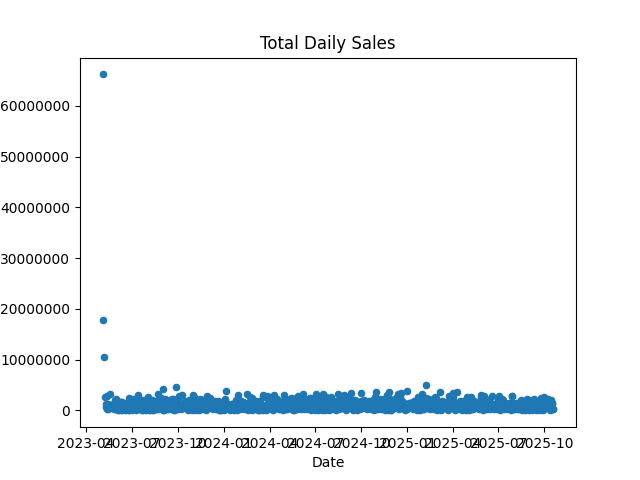

In [ ]:
df_data.plot.scatter(x='ds', y='y')
plt.ticklabel_format(axis='y',style='plain', useOffset=False)
plt.title("Total Daily Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
# plt.ticklabel_format(useOffset=False)


#### Remove outlier

In [ ]:
# remove outliers
df_data = df_data[df_data['ds']>= '2023-05-09'].reset_index(drop=True)
# df_data.describe()


,ds,y
count,895,893.00
mean,2024-07-29 00:00:00,1155036.82
min,2023-05-09 00:00:00,6518.87
25%,2023-12-18 12:00:00,542345.69
50%,2024-07-29 00:00:00,1005958.26
75%,2025-03-09 12:00:00,1628059.23
max,2025-10-19 00:00:00,5037625.15
std,NaN,815371.78


Text(0, 0.5, 'Sales')

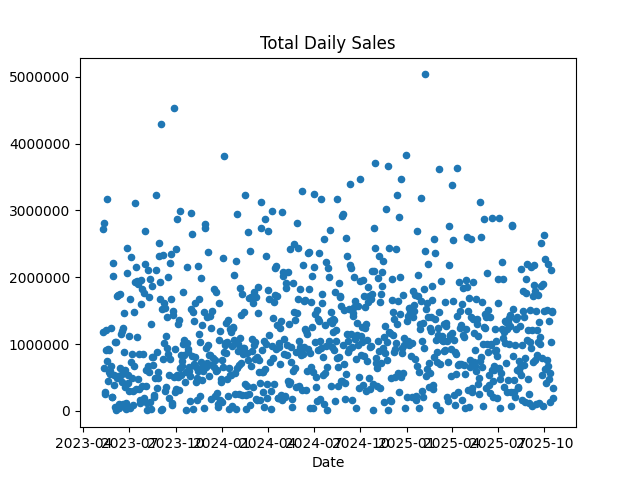

In [ ]:
# plt.figure(figsize=(15,5))
df_data.plot.scatter(x='ds', y='y')

plt.ticklabel_format(axis='y',style='plain', useOffset=True)
plt.title("Total Daily Sales")
plt.xlabel("Date")
plt.ylabel("Sales")

# plt.scatter(df_data.ds,df_data.y)
# plt.title("Total Daily Sales")
# plt.xlabel("Date")
# plt.ylabel("Sales")
# plt.ticklabel_format(axis='y',style='plain', useOffset=False)
# plt.show()


#### Interactive Scatter Plot

In [ ]:
# fig = px.scatter(df_data,
#                  x='ds',
#                  y='y',
#                 #  color='Category',         # Color points based on 'Category'
#                 #  size='y',       # Size points based on 'Size_Metric'
#                  hover_name='ds',    # Display 'Category' in hover tooltip
#                  title='Total Sales')
# fig.show()



# Create a Plotly figure
fig = go.Figure()

# Add actual data: training
fig.add_trace(go.Scatter(
    x=df_data['ds'],
    y=df_data['y'],
    mode='markers',
    name='Sales Data',
    marker=dict(color='#2C2A29')
))

# # Add actual data: test
# fig.add_trace(go.Scatter(
#     x=df_data_test['ds'],
#     y=df_data_test['y'],
#     mode='markers',
#     name='Validation Data',
#     marker=dict(color='red')
# ))

# # Add forecast
# fig.add_trace(go.Scatter(
#     x=forecast_prophet['ds'],
#     y=forecast_prophet['yhat'],
#     mode='lines',
#     name='Forecast',
#     line=dict(color='#1D62A1')
# ))

# # Add uncertainty interval (yhat_lower, yhat_upper)
# fig.add_trace(go.Scatter(
#     x=forecast_prophet['ds'],
#     y=forecast_prophet['yhat_upper'],
#     mode='lines',
#     # line=dict(width=0,color='#82A8CB'),
#     line=dict(width=0,color='#6896C1'),
#     showlegend=False,
#     name='Upper Bound'
# ))
# fig.add_trace(go.Scatter(
#     x=forecast_prophet['ds'],
#     y=forecast_prophet['yhat_lower'],
#     mode='lines',
#     # line=dict(width=0,color='#82A8CB'),
#     line=dict(width=0,color='#6896C1'),
#     fill='tonexty',
#     # fillcolor='rgba(0,100,80,0.2)',
#     fillcolor='rgba(104, 150, 193, 0.4)',
#     showlegend=False,
#     name='Lower Bound'
# ))

# # Add a dashed vertical line at a specific date
# # Ensure the x-value for the vertical line is of the same type as the x-axis data (datetime object)

# last_training_date = df_data_train.ds.max()
# fig.add_vline(x=last_training_date, line_width=2, line_dash="dash", line_color="red", name="Training End", showlegend=True)


# Update layout for better visualization
# Set plot background color to white
fig.update_layout(
    plot_bgcolor='white'
)

# Update x-axis to have light grey grid lines
fig.update_xaxes(
    gridcolor='lightgrey'
)

# Update y-axis to have light grey grid lines
fig.update_yaxes(
    gridcolor='lightgrey'
)

fig.update_layout(
    title='Sales: Time series Analysis',
    # xaxis_title='Date',
    yaxis_title='Sales'
)

# Update the layout to increase the height
fig.update_layout(height=600)

# extend the chart area
# Find the maximum
max_y_value = max(df_data['y'])
max_x_value = max(df_data['ds'])
min_x_value = min(df_data['ds'])
# Calculate a padding value (e.g., 10% of the max value)
y_padding = 500000
x_padding = + pd.Timedelta(days=10)

# Update the layout with a new axis range
# The lower bound can be set to the minimum value or 0, and the upper bound is extended
fig.update_layout(
    yaxis=dict(
        range=[-1000000, max_y_value + y_padding],
        # Sets autorange to false so your custom range is used
        autorange=False), 
    xaxis=dict(
        range=[min_x_value - x_padding, max_x_value + x_padding],
        # Sets autorange to false so your custom range is used
        autorange=False)
)


fig.show()
# print(max_y_value)





#### Trend review: Simple and Exponential Moving Averages: 7/15/30 Days

In [ ]:
df_scatter = df_data.copy()
df_scatter.head()


,ds,y
0,2023-05-09,2725992.98
1,2023-05-10,1178226.14
2,2023-05-11,647929.10
3,2023-05-12,2818177.86
4,2023-05-13,283487.85


In [ ]:
# Simple Moving Average (SMA)
df_scatter['SMA_7'] = df_scatter['y'].rolling(window=7, min_periods=5).mean()
df_scatter['SMA_15'] = df_scatter['y'].rolling(window=15, min_periods=12).mean()
df_scatter['SMA_30'] = df_scatter['y'].rolling(window=30, min_periods=25).mean()

# Exponential Moving Average (EMA)
df_scatter['EMA_span_7'] = df_scatter['y'].ewm(span=7, adjust=False).mean()
df_scatter['EMA_span_15'] = df_scatter['y'].ewm(span=15, adjust=False).mean()
df_scatter['EMA_span_30'] = df_scatter['y'].ewm(span=30, adjust=False).mean()

# # Weighted Moving Average (WMA) - example with custom weights
# weights = [0.1, 0.1, 0.2, 0.2, 0.4] # Example weights for a 5-day WMA
# sales_data['WMA_5'] = sales_data['Sales'].rolling(window=len(weights)).apply(
#     lambda x: (x * weights).sum() / sum(weights), raw=False

df_scatter.head()


,ds,y,SMA_7,SMA_15,SMA_30,EMA_span_7,EMA_span_15,EMA_span_30
0,2023-05-09,2725992.98,NaN,NaN,NaN,2725992.98,2725992.98,2725992.98
1,2023-05-10,1178226.14,NaN,NaN,NaN,2339051.27,2532522.12,2626137.05
2,2023-05-11,647929.10,NaN,NaN,NaN,1916270.73,2296948.00,2498510.74
3,2023-05-12,2818177.86,NaN,NaN,NaN,2141747.51,2362101.73,2519134.42
4,2023-05-13,283487.85,1530762.79,NaN,NaN,1677182.60,2102274.99,2374899.16


In [ ]:
# Create a Plotly figure
fig = go.Figure()

# Add actual data: training
fig.add_trace(go.Scatter(
    x=df_scatter['ds'],
    y=df_scatter['y'],
    mode='markers',
    name='Sales Data',
    marker=dict(color='#a7a8aa')
))

# Add SMA
fig.add_trace(go.Scatter(
    x=df_scatter['ds'],
    y=df_scatter['SMA_7'],
    mode='lines',
    name='SMA_7',
    line=dict(color='#78BE20')
))

# Add SMA
fig.add_trace(go.Scatter(
    x=df_scatter['ds'],
    y=df_scatter['SMA_15'],
    mode='lines',
    name='SMA_15',
    line=dict(color='#8031A7')
))

# Add SMA
fig.add_trace(go.Scatter(
    x=df_scatter['ds'],
    y=df_scatter['SMA_30'],
    mode='lines',
    name='SMA_30',
    line=dict(color='#FF6A13')
))


# # Add actual data: test
# fig.add_trace(go.Scatter(
#     x=df_data_test['ds'],
#     y=df_data_test['y'],
#     mode='markers',
#     name='Validation Data',
#     marker=dict(color='red')
# ))

# # Add forecast
# fig.add_trace(go.Scatter(
#     x=forecast_prophet['ds'],
#     y=forecast_prophet['yhat'],
#     mode='lines',
#     name='Forecast',
#     line=dict(color='#1D62A1')
# ))

# # Add uncertainty interval (yhat_lower, yhat_upper)
# fig.add_trace(go.Scatter(
#     x=forecast_prophet['ds'],
#     y=forecast_prophet['yhat_upper'],
#     mode='lines',
#     # line=dict(width=0,color='#82A8CB'),
#     line=dict(width=0,color='#6896C1'),
#     showlegend=False,
#     name='Upper Bound'
# ))
# fig.add_trace(go.Scatter(
#     x=forecast_prophet['ds'],
#     y=forecast_prophet['yhat_lower'],
#     mode='lines',
#     # line=dict(width=0,color='#82A8CB'),
#     line=dict(width=0,color='#6896C1'),
#     fill='tonexty',
#     # fillcolor='rgba(0,100,80,0.2)',
#     fillcolor='rgba(104, 150, 193, 0.4)',
#     showlegend=False,
#     name='Lower Bound'
# ))

# # Add a dashed vertical line at a specific date
# # Ensure the x-value for the vertical line is of the same type as the x-axis data (datetime object)

# last_training_date = df_data_train.ds.max()
# fig.add_vline(x=last_training_date, line_width=2, line_dash="dash", line_color="red", name="Training End", showlegend=True)


# Update layout for better visualization
# Set plot background color to white
fig.update_layout(
    plot_bgcolor='white'
)

# Update x-axis to have light grey grid lines
fig.update_xaxes(
    gridcolor='lightgrey'
)

# Update y-axis to have light grey grid lines
fig.update_yaxes(
    gridcolor='lightgrey'
)

fig.update_layout(
    title='Sales: 7/15/30 Day SMA',
    # xaxis_title='Date',
    yaxis_title='Sales'
)

# Update the layout to increase the height
fig.update_layout(height=500)

# extend the chart area
# Find the maximum
max_y_value = max(df_data['y'])
max_x_value = max(df_data['ds'])
min_x_value = min(df_data['ds'])
# Calculate a padding value (e.g., 10% of the max value)
y_padding = 500000
x_padding = + pd.Timedelta(days=10)

# Update the layout with a new axis range
# The lower bound can be set to the minimum value or 0, and the upper bound is extended
fig.update_layout(
    yaxis=dict(
        range=[-1000000, max_y_value + y_padding],
        # Sets autorange to false so your custom range is used
        autorange=False), 
    xaxis=dict(
        range=[min_x_value - x_padding, max_x_value + x_padding],
        # Sets autorange to false so your custom range is used
        autorange=False)
)


fig.show()
# print(max_y_value)


In [ ]:
# Create a Plotly figure
fig = go.Figure()

# Add actual data: training
fig.add_trace(go.Scatter(
    x=df_scatter['ds'],
    y=df_scatter['y'],
    mode='markers',
    name='Sales Data',
    marker=dict(color='#a7a8aa')
))

# Add SMA
fig.add_trace(go.Scatter(
    x=df_scatter['ds'],
    y=df_scatter['EMA_span_7'],
    mode='lines',
    name='EMA_7',
    line=dict(color='#78BE20')
))

# Add SMA
fig.add_trace(go.Scatter(
    x=df_scatter['ds'],
    y=df_scatter['EMA_span_15'],
    mode='lines',
    name='EMA_15',
    line=dict(color='#8031A7')
))

# Add SMA
fig.add_trace(go.Scatter(
    x=df_scatter['ds'],
    y=df_scatter['EMA_span_30'],
    mode='lines',
    name='EMA_30',
    line=dict(color='#FF6A13')
))


# # Add actual data: test
# fig.add_trace(go.Scatter(
#     x=df_data_test['ds'],
#     y=df_data_test['y'],
#     mode='markers',
#     name='Validation Data',
#     marker=dict(color='red')
# ))

# # Add forecast
# fig.add_trace(go.Scatter(
#     x=forecast_prophet['ds'],
#     y=forecast_prophet['yhat'],
#     mode='lines',
#     name='Forecast',
#     line=dict(color='#1D62A1')
# ))

# # Add uncertainty interval (yhat_lower, yhat_upper)
# fig.add_trace(go.Scatter(
#     x=forecast_prophet['ds'],
#     y=forecast_prophet['yhat_upper'],
#     mode='lines',
#     # line=dict(width=0,color='#82A8CB'),
#     line=dict(width=0,color='#6896C1'),
#     showlegend=False,
#     name='Upper Bound'
# ))
# fig.add_trace(go.Scatter(
#     x=forecast_prophet['ds'],
#     y=forecast_prophet['yhat_lower'],
#     mode='lines',
#     # line=dict(width=0,color='#82A8CB'),
#     line=dict(width=0,color='#6896C1'),
#     fill='tonexty',
#     # fillcolor='rgba(0,100,80,0.2)',
#     fillcolor='rgba(104, 150, 193, 0.4)',
#     showlegend=False,
#     name='Lower Bound'
# ))

# # Add a dashed vertical line at a specific date
# # Ensure the x-value for the vertical line is of the same type as the x-axis data (datetime object)

# last_training_date = df_data_train.ds.max()
# fig.add_vline(x=last_training_date, line_width=2, line_dash="dash", line_color="red", name="Training End", showlegend=True)


# Update layout for better visualization
# Set plot background color to white
fig.update_layout(
    plot_bgcolor='white'
)

# Update x-axis to have light grey grid lines
fig.update_xaxes(
    gridcolor='lightgrey'
)

# Update y-axis to have light grey grid lines
fig.update_yaxes(
    gridcolor='lightgrey'
)

fig.update_layout(
    title='Sales: 7/15/30 Days EMA',
    # xaxis_title='Date',
    yaxis_title='Sales'
)

# Update the layout to increase the height
fig.update_layout(height=500)

# extend the chart area
# Find the maximum
max_y_value = max(df_data['y'])
max_x_value = max(df_data['ds'])
min_x_value = min(df_data['ds'])
# Calculate a padding value (e.g., 10% of the max value)
y_padding = 500000
x_padding = + pd.Timedelta(days=10)

# Update the layout with a new axis range
# The lower bound can be set to the minimum value or 0, and the upper bound is extended
fig.update_layout(
    yaxis=dict(
        range=[-1000000, max_y_value + y_padding],
        # Sets autorange to false so your custom range is used
        autorange=False), 
    xaxis=dict(
        range=[min_x_value - x_padding, max_x_value + x_padding],
        # Sets autorange to false so your custom range is used
        autorange=False)
)


fig.show()
# print(max_y_value)


#### Trend Review: Linear Regression

In [ ]:
df_scatter_reg = df_scatter.copy()
df_scatter_reg = df_scatter_reg[df_scatter_reg['y'].notnull()]
df_scatter_reg = df_scatter_reg.reset_index(drop=True)

# Convert dates to a numerical feature for scikit-learn
df_scatter_reg['time_step'] = (df_scatter_reg['ds'] - df_scatter_reg['ds'].min()).dt.days.values.reshape(-1, 1)


In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(df_scatter_reg[['time_step']], df_scatter_reg['y'])

# Make predictions for the entire time period
df_scatter_reg['linear_reg_line'] = model.predict(df_scatter_reg[['time_step']])

# df_scatter_reg.head()


In [ ]:
# Create a Plotly figure
fig = go.Figure()

# Add actual data: training
fig.add_trace(go.Scatter(
    x=df_scatter['ds'],
    y=df_scatter['y'],
    mode='markers',
    name='Sales Data',
    marker=dict(color='#a7a8aa')
))

# Add linear regression line
fig.add_trace(go.Scatter(
    x=df_scatter_reg['ds'],
    y=df_scatter_reg['linear_reg_line'],
    mode='lines',
    name='Linear Regression Line',
    line=dict(color='#FF6A13')
))

# # Add SMA
# fig.add_trace(go.Scatter(
#     x=df_scatter['ds'],
#     y=df_scatter['SMA_15'],
#     mode='lines',
#     name='SMA_15',
#     line=dict(color='#8031A7')
# ))

# # Add SMA
# fig.add_trace(go.Scatter(
#     x=df_scatter['ds'],
#     y=df_scatter['SMA_30'],
#     mode='lines',
#     name='SMA_30',
#     line=dict(color='#FF6A13')
# ))


# # Add actual data: test
# fig.add_trace(go.Scatter(
#     x=df_data_test['ds'],
#     y=df_data_test['y'],
#     mode='markers',
#     name='Validation Data',
#     marker=dict(color='red')
# ))

# # Add forecast
# fig.add_trace(go.Scatter(
#     x=forecast_prophet['ds'],
#     y=forecast_prophet['yhat'],
#     mode='lines',
#     name='Forecast',
#     line=dict(color='#1D62A1')
# ))

# # Add uncertainty interval (yhat_lower, yhat_upper)
# fig.add_trace(go.Scatter(
#     x=forecast_prophet['ds'],
#     y=forecast_prophet['yhat_upper'],
#     mode='lines',
#     # line=dict(width=0,color='#82A8CB'),
#     line=dict(width=0,color='#6896C1'),
#     showlegend=False,
#     name='Upper Bound'
# ))
# fig.add_trace(go.Scatter(
#     x=forecast_prophet['ds'],
#     y=forecast_prophet['yhat_lower'],
#     mode='lines',
#     # line=dict(width=0,color='#82A8CB'),
#     line=dict(width=0,color='#6896C1'),
#     fill='tonexty',
#     # fillcolor='rgba(0,100,80,0.2)',
#     fillcolor='rgba(104, 150, 193, 0.4)',
#     showlegend=False,
#     name='Lower Bound'
# ))

# # Add a dashed vertical line at a specific date
# # Ensure the x-value for the vertical line is of the same type as the x-axis data (datetime object)

# last_training_date = df_data_train.ds.max()
# fig.add_vline(x=last_training_date, line_width=2, line_dash="dash", line_color="red", name="Training End", showlegend=True)


# Update layout for better visualization
# Set plot background color to white
fig.update_layout(
    plot_bgcolor='white'
)

# Update x-axis to have light grey grid lines
fig.update_xaxes(
    gridcolor='lightgrey'
)

# Update y-axis to have light grey grid lines
fig.update_yaxes(
    gridcolor='lightgrey'
)

fig.update_layout(
    title='Sales: Linear Regression Trend',
    # xaxis_title='Date',
    yaxis_title='Sales'
)

# Update the layout to increase the height
fig.update_layout(height=500)

# extend the chart area
# Find the maximum
max_y_value = max(df_data['y'])
max_x_value = max(df_data['ds'])
min_x_value = min(df_data['ds'])
# Calculate a padding value (e.g., 10% of the max value)
y_padding = 500000
x_padding = + pd.Timedelta(days=10)

# Update the layout with a new axis range
# The lower bound can be set to the minimum value or 0, and the upper bound is extended
fig.update_layout(
    yaxis=dict(
        range=[-1000000, max_y_value + y_padding],
        # Sets autorange to false so your custom range is used
        autorange=False), 
    xaxis=dict(
        range=[min_x_value - x_padding, max_x_value + x_padding],
        # Sets autorange to false so your custom range is used
        autorange=False)
)


fig.show()
# print(max_y_value)


In [ ]:
# plt.figure(figsize=(15,5))
# plt.plot(df_data.ds,df_data.y)
# plt.title("Total Daily Sales")
# plt.xlabel("Date")
# plt.ylabel("Sales")

# plt.ticklabel_format(axis='y',style='plain', useOffset=False)
# # plt.ticklabel_format(useOffset=False)

# plt.show()


#### Time Seties Forecasting with Prophet

In [59]:
# test train split

df_data_train = df_data[df_data["ds"] < "2025-06-01"]
df_data_test = df_data[df_data["ds"] >= "2025-06-01"]

display(df_data_train)


,ds,y
0,2023-05-09,2725992.98
1,2023-05-10,1178226.14
2,2023-05-11,647929.10
3,2023-05-12,2818177.86
4,2023-05-13,283487.85
...,...,...
749,2025-05-27,3121417.97
750,2025-05-28,2597228.75
751,2025-05-29,803503.57
752,2025-05-30,1635706.56


In [60]:
df_data_test.dtypes, df_data_test


(ds    datetime64[ns]
 y            float64
 dtype: object,
             ds          y
 754 2025-06-01   77454.79
 755 2025-06-02  994863.18
 756 2025-06-03 2866849.76
 757 2025-06-04 1249183.26
 758 2025-06-05 1241632.74
 ..         ...        ...
 890 2025-10-15 2111601.60
 891 2025-10-16 1497458.19
 892 2025-10-17 1485020.83
 893 2025-10-18  340250.18
 894 2025-10-19  196076.00
 
 [141 rows x 2 columns])

In [ ]:
# Decomposing training data
# from statsmodels.tsa.seasonal import seasonal_decompose
# decompose = seasonal_decompose(df_data_train.y, model='additive', extrapolate_trend='freq', period=12)
# decompose.plot().show()


In [68]:
model_prophet  = Prophet()
model_prophet.fit(df_data_train)


22:58:59 - cmdstanpy - INFO - Chain [1] start processing
22:59:00 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
df_future = model_prophet.make_future_dataframe(periods=360, freq='D')
display(df_future)


,ds
0,2023-05-09
1,2023-05-10
2,2023-05-11
3,2023-05-12
4,2023-05-13
...,...
1109,2026-05-22
1110,2026-05-23
1111,2026-05-24
1112,2026-05-25


In [70]:
forecast_prophet = model_prophet.predict(df_future)
forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round().tail()


,ds,yhat,yhat_lower,yhat_upper
1109,2026-05-22,1646998.00,805937.00,2568222.00
1110,2026-05-23,807677.00,-22142.00,1716480.00
1111,2026-05-24,704547.00,-152302.00,1644252.00
1112,2026-05-25,1664190.00,768076.00,2559123.00
1113,2026-05-26,1985814.00,1149986.00,2857216.00


In [187]:
df_data_test.head()

forecast_prophet.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-05-09,984834.66,501842.95,2315045.14,984834.66,984834.66,456591.31,456591.31,456591.31,527159.97,527159.97,527159.97,-70568.66,-70568.66,-70568.66,0.00,0.00,0.00,1441425.97
1,2023-05-10,985324.32,214564.85,2037485.17,985324.32,985324.32,152725.29,152725.29,152725.29,226629.22,226629.22,226629.22,-73903.93,-73903.93,-73903.93,0.00,0.00,0.00,1138049.62
2,2023-05-11,985813.99,259144.44,2036175.62,985813.99,985813.99,118142.87,118142.87,118142.87,195592.46,195592.46,195592.46,-77449.59,-77449.59,-77449.59,0.00,0.00,0.00,1103956.86
3,2023-05-12,986303.65,241833.87,1993427.63,986303.65,986303.65,130358.81,130358.81,130358.81,211425.49,211425.49,211425.49,-81066.68,-81066.68,-81066.68,0.00,0.00,0.00,1116662.46
4,2023-05-13,986793.31,-625449.00,1197224.00,986793.31,986793.31,-716990.25,-716990.25,-716990.25,-632382.73,-632382.73,-632382.73,-84607.53,-84607.53,-84607.53,0.00,0.00,0.00,269803.06


#### Sales Forecast: Review Forecast Plot

##### Plot option 1: less interactive

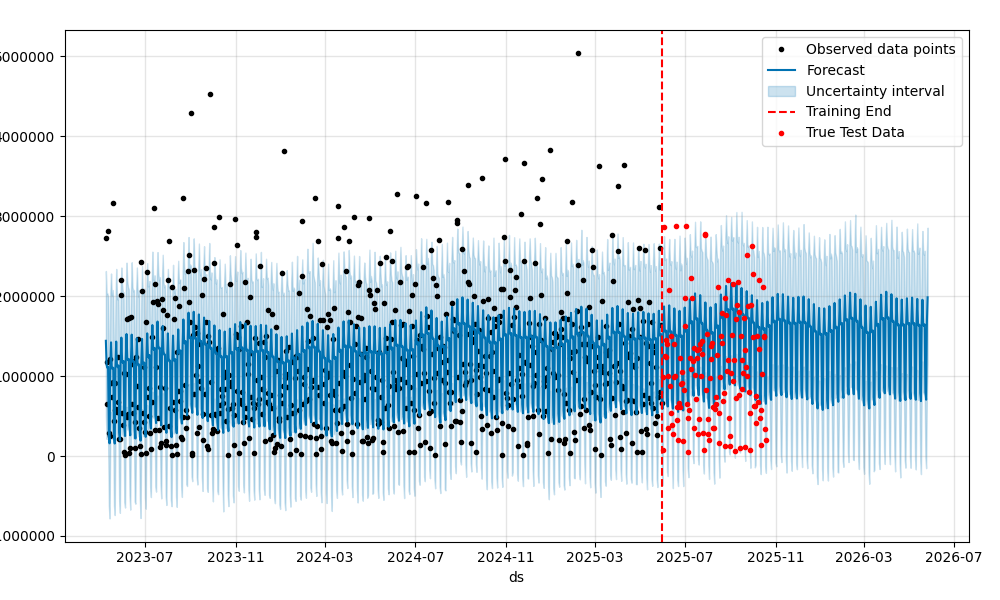

In [72]:
# plot the time series 
forecast_plot = model_prophet.plot(forecast_prophet)

# add a vertical line at the end of the training period
axes = forecast_plot.gca()
last_training_date = df_data_train.ds.max()
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')

# plot true test data for the period after the red line
# df_data_test['ds'] = pd.to_datetime(df_data_test['ds'])
plt.plot(df_data_test['ds'], df_data_test['y'],'ro', markersize=3, label='True Test Data')
plt.ticklabel_format(axis='y',style='plain', useOffset=True)

# show the legend to distinguish between the lines
plt.legend()


##### Plot option 2: More interactive

In [186]:
# Create a Plotly figure
fig = go.Figure()

# Add actual data: training
fig.add_trace(go.Scatter(
    x=df_data_train['ds'],
    y=df_data_train['y'],
    mode='markers',
    name='Training Data',
    marker=dict(color='#2C2A29')
))

# Add actual data: test
fig.add_trace(go.Scatter(
    x=df_data_test['ds'],
    y=df_data_test['y'],
    mode='markers',
    name='Validation Data',
    marker=dict(color='#DA1884')
))

# Add forecast
fig.add_trace(go.Scatter(
    x=forecast_prophet['ds'],
    y=forecast_prophet['yhat'],
    mode='lines',
    name='Forecast',
    # line=dict(color='#1D62A1')
    line=dict(color='#00A9E0')
))

# Add uncertainty interval (yhat_lower, yhat_upper)
fig.add_trace(go.Scatter(
    x=forecast_prophet['ds'],
    y=forecast_prophet['yhat_upper'],
    mode='lines',
    # line=dict(width=0,color='#82A8CB'),
    # line=dict(width=0,color='#6896C1'),
    line=dict(width=0,color='#99DDF3'),
    showlegend=False,
    name='Upper Bound'
))
fig.add_trace(go.Scatter(
    x=forecast_prophet['ds'],
    y=forecast_prophet['yhat_lower'],
    mode='lines',
    # line=dict(width=0,color='#82A8CB'),
    # line=dict(width=0,color='#6896C1'),
    line=dict(width=0,color='#99DDF3'),
    fill='tonexty',
    # fillcolor='rgba(0,100,80,0.2)',
    fillcolor='rgba(104, 150, 193, 0.4)',
    showlegend=False,
    name='Lower Bound'
))

# Add linear regression line
fig.add_trace(go.Scatter(
    x=df_scatter_reg['ds'],
    y=df_scatter_reg['linear_reg_line'],
    mode='lines',
    name='Linear Regression Line',
    line=dict(color='#FF6A13')
))

# Add a dashed vertical line at a specific date
# Ensure the x-value for the vertical line is of the same type as the x-axis data (datetime object)

last_training_date = df_data_train.ds.max()
fig.add_vline(x=last_training_date, line_width=2, line_dash="dash", line_color="#DA1884", name="Training End", showlegend=True)


# Update layout for better visualization
# Set plot background color to white
fig.update_layout(
    plot_bgcolor='white'
)

# Update x-axis to have light grey grid lines
fig.update_xaxes(
    gridcolor='lightgrey'
)

# Update y-axis to have light grey grid lines
fig.update_yaxes(
    gridcolor='lightgrey'
)

fig.update_layout(
    title='Sales Forecast: Time series using Prophet',
    # xaxis_title='Date',
    yaxis_title='Sales'
)

# Update the layout to increase the height
fig.update_layout(height=600)

# extend the chart area
# Find the maximum
max_y_value = max(df_data_train['y'])
max_x_value = max(forecast_prophet['ds'])
min_x_value = min(forecast_prophet['ds'])
# Calculate a padding value (e.g., 10% of the max value)
y_padding = 500000
x_padding = + pd.Timedelta(days=10)

# Update the layout with a new axis range
# The lower bound can be set to the minimum value or 0, and the upper bound is extended
fig.update_layout(
    yaxis=dict(
        range=[-1000000, max_y_value + y_padding],
        # Sets autorange to false so your custom range is used
        autorange=False), 
    xaxis=dict(
        range=[min_x_value - x_padding, max_x_value + x_padding],
        # Sets autorange to false so your custom range is used
        autorange=False)
)


fig.show()
# print(max_y_value)


# END

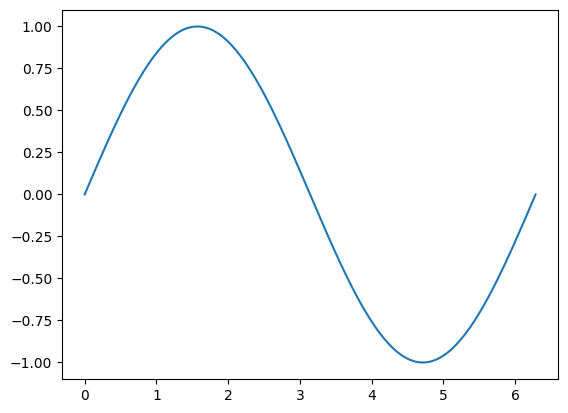

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 200)
plt.plot(x, np.sin(x))


In [50]:

# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 200)
plt.plot(x, np.sin(x))


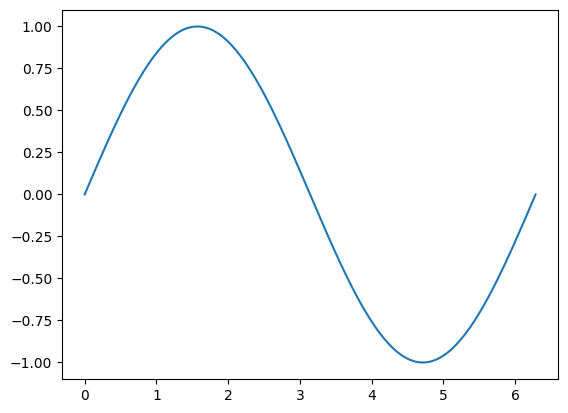

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
# %matplotlib inline
x = np.linspace(0, 2 * np.pi, 200)
plt.plot(x, np.sin(x))
plt.show() # Add this line


In [ ]:
# Manually Creating a Plotly Figure


import plotly.graph_objects as go
from prophet import Prophet
import pandas as pd

# Sample data (replace with your actual data)
data = pd.DataFrame({
    'ds': pd.to_datetime(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05']),
    'y': [10, 12, 15, 13, 16]
})

# Create and fit a Prophet model
m = Prophet()
m.fit(data)

# Create a future dataframe for forecasting
future = m.make_future_dataframe(periods=3)
forecast = m.predict(future)

# Create a Plotly figure
fig = go.Figure()

# Add actual data
fig.add_trace(go.Scatter(
    x=data['ds'],
    y=data['y'],
    mode='markers',
    name='Actual Data'
))

# Add forecast
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat'],
    mode='lines',
    name='Forecast',
    line=dict(color='blue')
))

# Add uncertainty interval (yhat_lower, yhat_upper)
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_upper'],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    name='Upper Bound'
))
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_lower'],
    mode='lines',
    line=dict(width=0),
    fill='tonexty',
    fillcolor='rgba(0,100,80,0.2)',
    showlegend=False,
    name='Lower Bound'
))

# Update layout for better visualization
fig.update_layout(
    title='Prophet Forecast',
    xaxis_title='Date',
    yaxis_title='Value'
)

fig.show()


22:51:42 - cmdstanpy - INFO - Chain [1] start processing
22:51:42 - cmdstanpy - INFO - Chain [1] done processing
